# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import requests 
import json
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [14]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


In [15]:
cities

['agryz',
 'la ronge',
 'hujra shah muqim',
 'dalnegorsk',
 'kununurra',
 'albany',
 'klyuchi',
 'ridgecrest',
 "kolyvan'",
 'ciudad lazaro cardenas',
 'blackmans bay',
 'mokhsogollokh',
 'the pas',
 'adamstown',
 'dickinson',
 'sonqor',
 'moose jaw',
 'edinburgh of the seven seas',
 'grytviken',
 'greenland',
 'anadyr',
 'puerto natales',
 'port-aux-francais',
 'invercargill',
 'hami',
 'kismayo',
 'vredendal',
 'olonkinbyen',
 'general roca',
 'cannonvale',
 'uturoa',
 'talnakh',
 'bununu',
 'tolanaro',
 'sorong',
 'tibanbang',
 'jamestown',
 'west island',
 'thunder bay',
 'afaahiti',
 'nadym',
 'waitangi',
 'zhangjiakou',
 'vorgashor',
 'ta`u',
 'salalah',
 'carauari',
 'yellowknife',
 'udachny',
 'sao jose da coroa grande',
 'papao',
 'poronaysk',
 'kirillov',
 'thompson',
 'crane',
 'savanna-la-mar',
 'constantia',
 'atafu village',
 'mili',
 'avarua',
 'ushuaia',
 'trinidad',
 'iqaluit',
 'georgetown',
 'vilyuchinsk',
 'georgiyevka',
 'hamilton',
 'wailua homesteads',
 'petal',


In [57]:
url = "https://api.openweathermap.org/data/2.5/weather?"
city_url = url + "appid=" + weather_api_key + "&q="
city_weather = requests.get(city_url + city).json()
city_weather

{'coord': {'lon': -97.2117, 'lat': 27.8778},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 294.57,
  'feels_like': 294.83,
  'temp_min': 293.14,
  'temp_max': 295.95,
  'pressure': 1019,
  'humidity': 79},
 'visibility': 10000,
 'wind': {'speed': 1.79, 'deg': 172, 'gust': 3.58},
 'clouds': {'all': 12},
 'dt': 1712888545,
 'sys': {'type': 2,
  'id': 2076457,
  'country': 'US',
  'sunrise': 1712837243,
  'sunset': 1712883097},
 'timezone': -18000,
 'id': 4700033,
 'name': 'Ingleside',
 'cod': 200}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [58]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=metric"
Units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

     # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | agryz
Processing Record 2 of Set 1 | la ronge
Processing Record 3 of Set 1 | hujra shah muqim
Processing Record 4 of Set 1 | dalnegorsk
Processing Record 5 of Set 1 | kununurra
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | klyuchi
Processing Record 8 of Set 1 | ridgecrest
Processing Record 9 of Set 1 | kolyvan'
Processing Record 10 of Set 1 | ciudad lazaro cardenas
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | mokhsogollokh
Processing Record 13 of Set 1 | the pas
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | dickinson
Processing Record 16 of Set 1 | sonqor
Processing Record 17 of Set 1 | moose jaw
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | greenland
Processing Record 21 of Set 1 | anadyr
Processing Record 22 of Set 1 | puerto

In [59]:
url = "https://api.openweathermap.org/data/2.5/weather?"
city_url = url + "appid=" + weather_api_key + "&q="
city_weather = requests.get(city_url + city).json()
city_url

'https://api.openweathermap.org/data/2.5/weather?appid=7b9b23806ef72cd9b5269497756f4542&q='

In [60]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [61]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,agryz,56.5203,52.9942,7.64,86,26,3.79,RU,1712889345
1,la ronge,55.1001,-105.2842,2.14,69,20,3.09,CA,1712889345
2,hujra shah muqim,30.7418,73.8236,29.23,18,62,3.18,PK,1712889345
3,dalnegorsk,44.5604,135.5701,17.56,88,0,1.34,RU,1712889345
4,kununurra,-15.7667,128.7333,30.99,33,12,5.66,AU,1712889345


In [62]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [63]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,agryz,56.5203,52.9942,7.64,86,26,3.79,RU,1712889345
1,la ronge,55.1001,-105.2842,2.14,69,20,3.09,CA,1712889345
2,hujra shah muqim,30.7418,73.8236,29.23,18,62,3.18,PK,1712889345
3,dalnegorsk,44.5604,135.5701,17.56,88,0,1.34,RU,1712889345
4,kununurra,-15.7667,128.7333,30.99,33,12,5.66,AU,1712889345


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

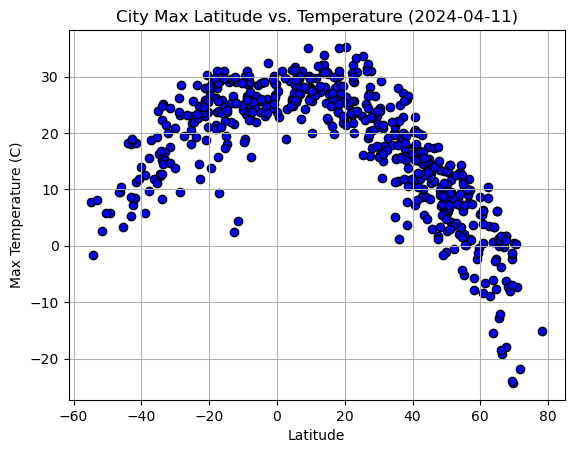

In [64]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-04-11)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")
plt.tight_layout

# Show plot
plt.show()

#### Latitude Vs. Humidity

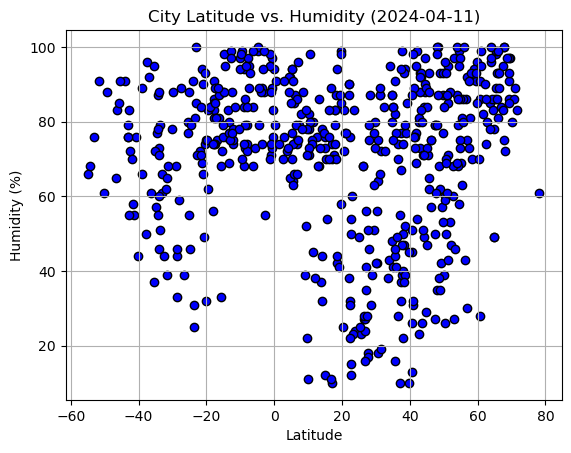

In [65]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-04-11)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Incorporate the other graph properties
# Save the figure
plt.savefig("output_data/Fig2.png")
plt.tight_layout

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

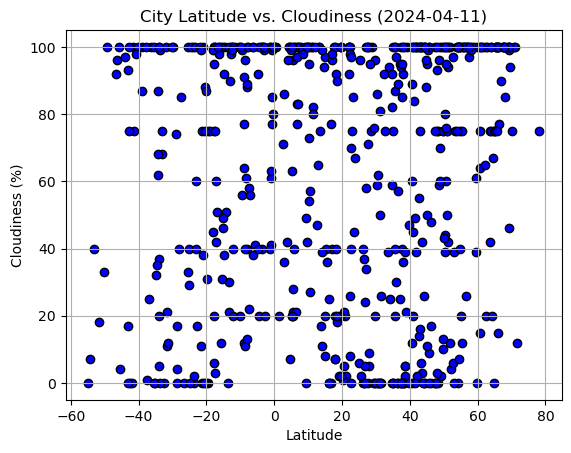

In [66]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-04-11)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Incorporate the other graph properties

# Save the figure
plt.savefig("output_data/Fig3.png")
plt.tight_layout

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

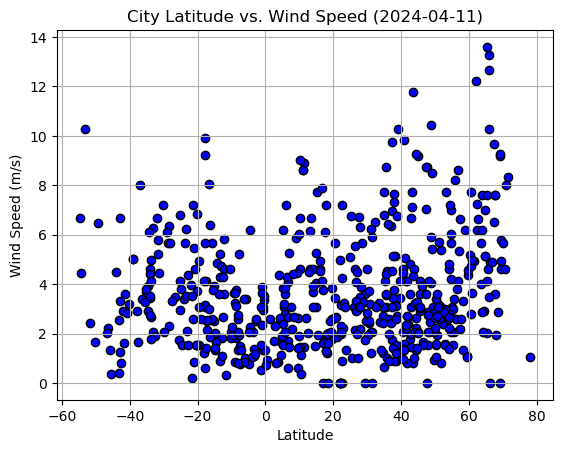

In [67]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-04-11)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Incorporate the other graph properties

# Save the figure
plt.savefig("output_data/Fig4.png")
plt.tight_layout

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [68]:
# Define a function to create Linear Regression plots
line_eq = "y = "+ str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.05x +2.39


In [69]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat'] >=0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,agryz,56.5203,52.9942,7.64,86,26,3.79,RU,1712889345
1,la ronge,55.1001,-105.2842,2.14,69,20,3.09,CA,1712889345
2,hujra shah muqim,30.7418,73.8236,29.23,18,62,3.18,PK,1712889345
3,dalnegorsk,44.5604,135.5701,17.56,88,0,1.34,RU,1712889345
5,albany,42.6001,-73.9662,15.73,80,100,1.79,US,1712889267


In [70]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat'] <0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,kununurra,-15.7667,128.7333,30.99,33,12,5.66,AU,1712889345
10,blackmans bay,-43.0167,147.3167,18.07,76,93,3.32,AU,1712889345
13,adamstown,-25.0660,-130.1015,21.83,55,29,6.78,PN,1712889346
17,edinburgh of the seven seas,-37.0676,-12.3116,18.77,92,25,8.01,SH,1712889346
18,grytviken,-54.2811,-36.5092,-1.63,68,7,4.46,GS,1712889346


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7693180139112137
The r value is: -0.8771077550171437


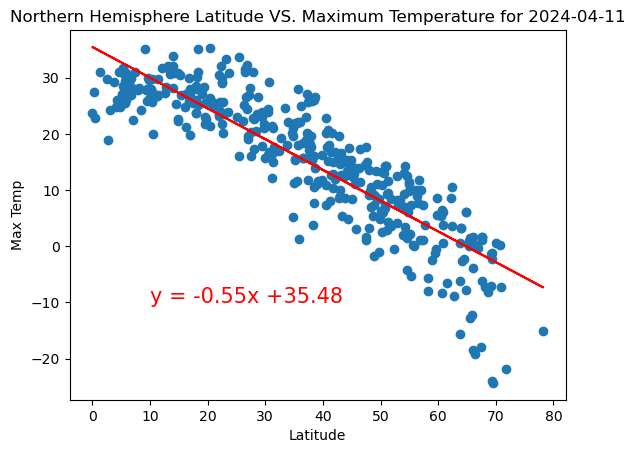

In [73]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")
plt.title('Northern Hemisphere Latitude VS. Maximum Temperature for 2024-04-11')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.tight_layout

print(f"The r-squared is: {rvalue**2}")
print(f"The r value is: {rvalue}")

The r-squared is: 0.5177948953819704
The r value is: 0.7195796657646535


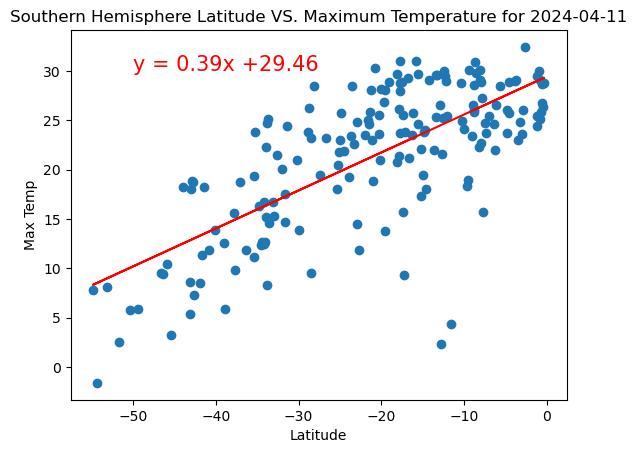

In [76]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.title('Southern Hemisphere Latitude VS. Maximum Temperature for 2024-04-11')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.tight_layout

print(f"The r-squared is: {rvalue**2}")
print(f"The r value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.04000669547721622
The r value is: 0.20001673799263955


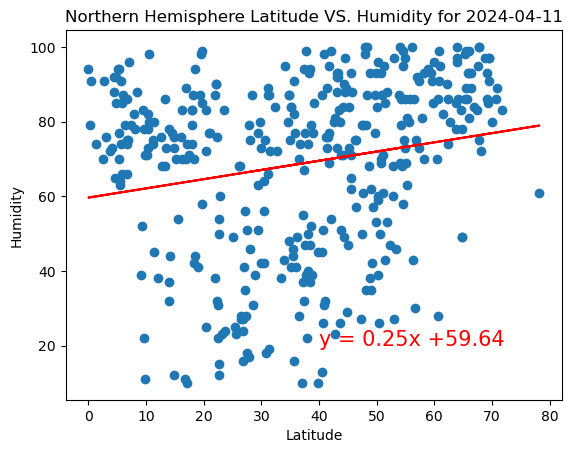

In [77]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.title('Northern Hemisphere Latitude VS. Humidity for 2024-04-11')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.tight_layout

print(f"The r-squared is: {rvalue**2}")
print(f"The r value is: {rvalue}")

The r-squared is: 0.11020291048120744
The r value is: 0.33196823715712237


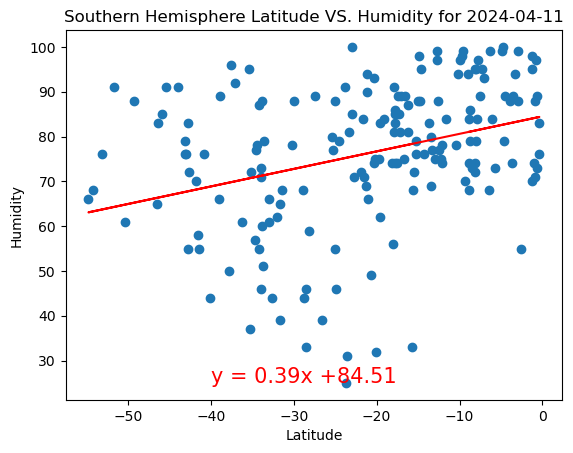

In [78]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-40,25),fontsize=15,color="red")
plt.title('Southern Hemisphere Latitude VS. Humidity for 2024-04-11')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.tight_layout

print(f"The r-squared is: {rvalue**2}")
print(f"The r value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.01295134045550601
The r value is: 0.11380395623837516


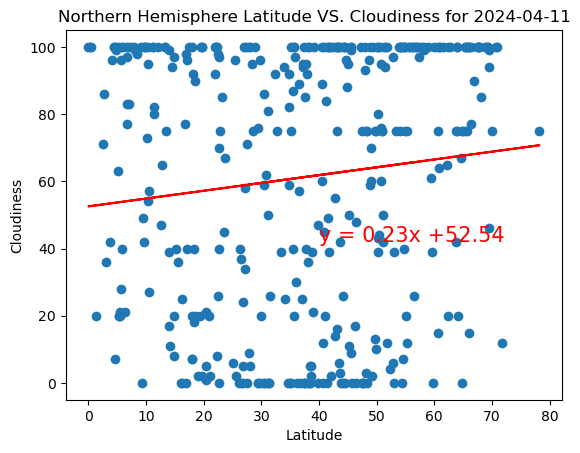

In [79]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(40,42),fontsize=15,color="red")
plt.title('Northern Hemisphere Latitude VS. Cloudiness for 2024-04-11')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.tight_layout

print(f"The r-squared is: {rvalue**2}")
print(f"The r value is: {rvalue}")

The r-squared is: 0.03515005235317271
The r value is: 0.1874834722133466


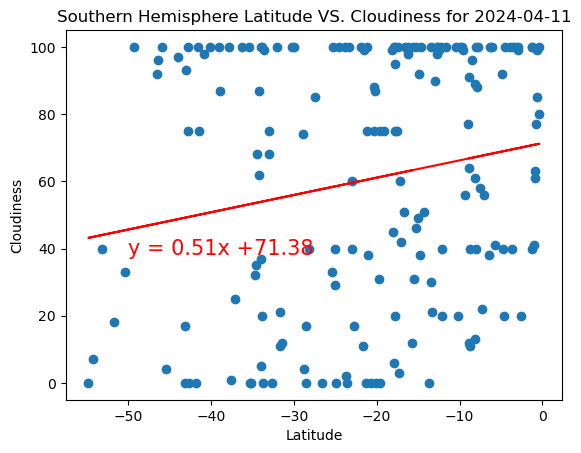

In [80]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-50,38),fontsize=15,color="red")
plt.title('Southern Hemisphere Latitude VS. Cloudiness for 2024-04-11')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.tight_layout

print(f"The r-squared is: {rvalue**2}")
print(f"The r value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.061821608051957966
The r value is: 0.248639514261024


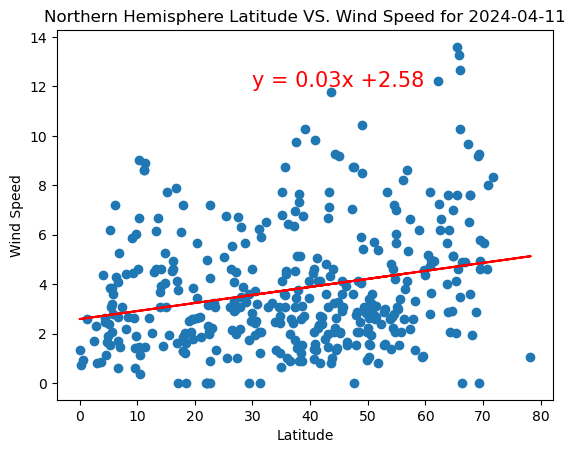

In [81]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(30,12),fontsize=15,color="red")
plt.title('Northern Hemisphere Latitude VS. Wind Speed for 2024-04-11')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.tight_layout

print(f"The r-squared is: {rvalue**2}")
print(f"The r value is: {rvalue}")

The r-squared is: 0.06105129780784759
The r value is: -0.24708560825723458


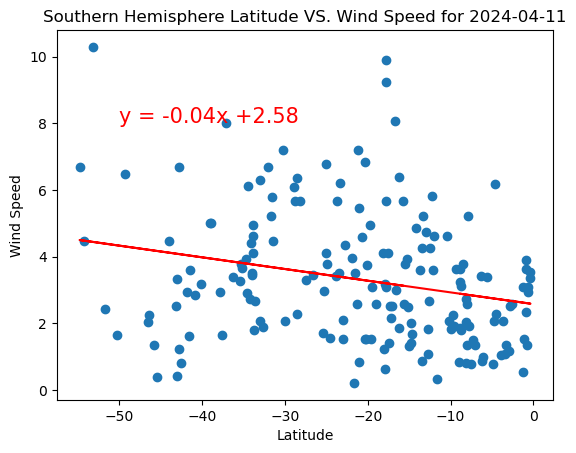

In [84]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-50,8),fontsize=15,color="red")
plt.title('Southern Hemisphere Latitude VS. Wind Speed for 2024-04-11')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.tight_layout

print(f"The r-squared is: {rvalue**2}")
print(f"The r value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE